# Forecasting the Temperature in Astana 2010-2020 by Team Don't be SAD

# Introduction

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. In our work we've worked with the dataset of the weather of the Astana between 2010 and 2020 and tried to forecast further temperature for the January 2021.

# Plan of the analysis

+ Data Scrapping
+ Data Cleaning and Preprocessing
+ Data Visualisation
+ Model Creation and Evaluation
+ Summary

# Objectives of the research

- Find whether there any dramatic changes in temperature throughout the period.
- Determine what season has the strongest winds.
- Observe the changes of the average wind speed.
- Discover the differences between day and night pressure.
- Create good weather forecasting model with LSTM model

# Data description

- Day	- day of the date
- Month	 - month of the date
- Year	- year of the date
- Temperature	- daytime temperature
- Pressure	- daytime pressure
- Cloud_cover	- daytime cover type of the cloud
- Phenomena	- daytime phenomena (rain, snow)
- Wind	- daytime wind speed
- Night_Temperature	- night temperature
- Night_Pressure	- night pressure
- Night_Cloud_cover	- night cloud cover
- Night_Phenomena	- night phenomena 
- Night_Wind - nighttime wind speed

# Data Scrapping

We will scrap the data from the website Gismeteo (https://www.gismeteo.ru/diary/5164/2006/5/) in the period from 2010 till 2020


Here is the all necessary library to scrapping part

In [ ]:
#Library for BeautifulSoup
from bs4 import BeautifulSoup as BS
import requests
import xlwt
import pandas as pd  

In [ ]:
headers ={
    'Connection': 'keep-alive',
    'Cache-Control': 'max-age=0',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.85 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'DNT': '1',
    'Accept-Encoding': 'gzip, deflate, lzma, sdch',
    'Accept-Language': 'ru-RU,ru;q=0.8,en-US;q=0.6,en;q=0.4'
}

In [ ]:
# List to store the all information
all_info = []
# Lists of the year and month
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# here we will go through the year and month by two dimensional loop 
for y in year:
    for m in month:
      # Taking the each page's link
        link = 'https://www.gismeteo.ru/diary/5164/' + str(y) + '/' + str(m) + '/'
        print(link)
        req_link = requests.get(link, headers=headers)
        html = BS(req_link.content, 'lxml')
        table = html.find_all('table')
        table = table[0]
        trs = table.find_all('tr')
        for tr in trs:
            try:
                day = tr.find_all('td', {'class': 'first'})[0].get_text(strip = True)
            except:
                day = ''
            try:
                temp = tr.find('td', {'class': 'first_in_group'}).get_text(strip = True)
            except:
                temp = ''
            try:
                prec = tr.find_all('td')[2].get_text(strip = True)
            except:
                prec = ''
            try:
                src = tr.find_all('td')[3].find_all('img', {'class': 'label_icon label_small screen_icon'})[0]['src']
                
                if src == '//st5.gismeteo.ru/static/diary/img/suncl.png':
                    cl_cover = 'partly cloudy'
                elif src == '//st6.gismeteo.ru/static/diary/img/suncl.png':
                    cl_cover = 'partly cloudy'
                elif src == '//st7.gismeteo.ru/static/diary/img/suncl.png':
                    cl_cover = 'partly cloudy'
                elif src == '//st8.gismeteo.ru/static/diary/img/suncl.png':
                    cl_cover = 'partly cloudy'
                elif src == '//st4.gismeteo.ru/static/diary/img/suncl.png':
                    cl_cover = 'partly cloudy'
                    
                elif src == '//st4.gismeteo.ru/static/diary/img/dull.png':
                    cl_cover = 'cloudy'
                elif src == '//st5.gismeteo.ru/static/diary/img/dull.png':
                    cl_cover = 'cloudy'
                elif src == '//st6.gismeteo.ru/static/diary/img/dull.png':
                    cl_cover = 'cloudy'
                elif src == '//st7.gismeteo.ru/static/diary/img/dull.png':
                    cl_cover = 'cloudy'
                elif src == '//st8.gismeteo.ru/static/diary/img/dull.png':
                    cl_cover = 'cloudy'
                    
                    
                
                elif src == '//st5.gismeteo.ru/static/diary/img/sun.png':
                    cl_cover = 'clear'
                elif src == '//st4.gismeteo.ru/static/diary/img/sun.png':
                    cl_cover = 'clear'
                elif src == '//st6.gismeteo.ru/static/diary/img/sun.png':
                    cl_cover = 'clear'
                elif src == '//st7.gismeteo.ru/static/diary/img/sun.png':
                    cl_cover = 'clear'
                elif src == '//st8.gismeteo.ru/static/diary/img/sun.png':
                    cl_cover = 'clear'
                else:
                    cl_cover = 'quarterly cloudy'
            except:
                cl_cover = ''
            try:
                src2 = tr.find_all('td')[4].img['src']
                if src2 == '//st4.gismeteo.ru/static/diary/img/snow.png':
                    Phenomena = 'snow'
                elif src2 == '//st5.gismeteo.ru/static/diary/img/snow.png':
                    Phenomena = 'snow'
                elif src2 == '//st6.gismeteo.ru/static/diary/img/snow.png':
                    Phenomena = 'snow'
                elif src2 == '//st7.gismeteo.ru/static/diary/img/snow.png':
                    Phenomena = 'snow'
                elif src2 == '//st8.gismeteo.ru/static/diary/img/snow.png':
                    Phenomena = 'snow'
                    
                else:
                    Phenomena = 'snow'
            except:
                Phenomena =''
            try:
                wind = tr.find_all('td')[5].get_text(strip = True)
            except:
                wind = ''
            try: 
                night_temp = tr.find_all('td')[6].get_text(strip = True)
            except:
                night_temp = ''
            try:
                night_prec = table.find_all('td')[7].get_text(strip = True)
            except:
                night_prec = ''
            try:
                src = tr.find_all('td')[8].img['src'] 
                if src == '//st5.gismeteo.ru/static/diary/img/suncl.png':
                    night_cl_cover = 'partly cloudy'
                elif src == '//st6.gismeteo.ru/static/diary/img/suncl.png':
                    night_cl_cover = 'partly cloudy'
                elif src == '//st7.gismeteo.ru/static/diary/img/suncl.png':
                    night_cl_cover = 'partly cloudy'
                elif src == '//st8.gismeteo.ru/static/diary/img/suncl.png':
                    night_cl_cover = 'partly cloudy'
                elif src == '//st4.gismeteo.ru/static/diary/img/suncl.png':
                    night_cl_cover = 'partly cloudy'
                    
                elif src == '//st4.gismeteo.ru/static/diary/img/dull.png':
                    night_cl_cover = 'cloudy'
                elif src == '//st5.gismeteo.ru/static/diary/img/dull.png':
                    night_cl_cover = 'cloudy'
                elif src == '//st6.gismeteo.ru/static/diary/img/dull.png':
                    night_cl_cover = 'cloudy'
                elif src == '//st7.gismeteo.ru/static/diary/img/dull.png':
                    night_cl_cover = 'cloudy'
                elif src == '//st8.gismeteo.ru/static/diary/img/dull.png':
                    night_cl_cover = 'cloudy'
                    
                    
                
                elif src == '//st5.gismeteo.ru/static/diary/img/sun.png':
                    night_cl_cover = 'clear'
                elif src == '//st4.gismeteo.ru/static/diary/img/sun.png':
                    night_cl_cover = 'clear'
                elif src == '//st6.gismeteo.ru/static/diary/img/sun.png':
                    night_cl_cover = 'clear'
                elif src == '//st7.gismeteo.ru/static/diary/img/sun.png':
                    night_cl_cover = 'clear'
                elif src == '//st8.gismeteo.ru/static/diary/img/sun.png':
                    night_cl_cover = 'clear'
                    
                elif src == '//st5.gismeteo.ru/static/diary/img/sunc.png':
                    night_cl_cover = 'clear'
                elif src == '//st4.gismeteo.ru/static/diary/img/sunc.png':
                    night_cl_cover = 'clear'
                elif src == '//st6.gismeteo.ru/static/diary/img/sunc.png':
                    night_cl_cover = 'clear'
                elif src == '//st7.gismeteo.ru/static/diary/img/sunc.png':
                    night_cl_cover = 'clear'
                elif src == '//st8.gismeteo.ru/static/diary/img/sunc.png':
                    night_cl_cover = 'clear'
            except:
                night_cl_cover = ''
            try:
                src2 = tr.find_all('td')[9].img['src']
                if src2 == '//st4.gismeteo.ru/static/diary/img/snow.png':
                    nightPhenomena = 'snow'
                elif src2 == '//st5.gismeteo.ru/static/diary/img/snow.png':
                    nightPhenomena = 'snow'
                elif src2 == '//st6.gismeteo.ru/static/diary/img/snow.png':
                    nightPhenomena = 'snow'
                elif src2 == '//st7.gismeteo.ru/static/diary/img/snow.png':
                    nightPhenomena = 'snow'
                elif src2 == '//st8.gismeteo.ru/static/diary/img/snow.png':
                    nightPhenomena = 'snow'
                else:
                    nightPhenomena = 'rain'
            except:
                nightPhenomena =''
            try:
                night_wind = tr.find_all('td')[5].get_text(strip = True)
            except:
                night_wind = ''
            if day != '':
                print(day, str(m), str(y), temp, prec, cl_cover, Phenomena, wind, night_temp, night_prec, night_cl_cover, nightPhenomena, night_wind)
                all_info.append([day, str(m), y, temp, prec, cl_cover, Phenomena, wind, night_temp, night_prec, night_cl_cover, nightPhenomena, night_wind])


https://www.gismeteo.ru/diary/5164/2010/1/
1 1 2010 -19 734 quarterly cloudy  СВ 2м/с -24 737 clear  СВ 2м/с
2 1 2010 -23 736 cloudy  СВ 4м/с -16 737 cloudy  СВ 4м/с
3 1 2010 -17 728 cloudy snow СВ 5м/с -19 737 cloudy snow СВ 5м/с
4 1 2010 -9 729 cloudy  СВ 3м/с -5 737 cloudy  СВ 3м/с
5 1 2010 0 726 cloudy snow Ю 3м/с -4 737 cloudy snow Ю 3м/с
6 1 2010 -6 724 cloudy snow В 5м/с -19 737 cloudy snow В 5м/с
7 1 2010 -27 739 cloudy  СВ 5м/с -31 737 clear snow СВ 5м/с
8 1 2010 -28 748 clear  СВ 5м/с -30 737 clear  СВ 5м/с
9 1 2010 -17 751 clear  Ш -22 737 clear  Ш
10 1 2010 -14 745 cloudy  ЮЗ 5м/с -12 737 cloudy snow ЮЗ 5м/с
11 1 2010 -13 733 cloudy snow ЮЗ 3м/с -14 737 cloudy snow ЮЗ 3м/с
12 1 2010 -23 735 clear  ЮЗ 2м/с -28 737 clear snow ЮЗ 2м/с
13 1 2010 -16 728 quarterly cloudy  Ю 2м/с -22 737 cloudy snow Ю 2м/с
14 1 2010 -11 726 cloudy snow ЮЗ 7м/с -11 737 cloudy snow ЮЗ 7м/с
15 1 2010 -15 731 quarterly cloudy  З 2м/с -24 737 clear  З 2м/с
16 1 2010 -25 742 quarterly cloudy snow Ю 3м/

1 6 2010 +20 736 clear  ЮЗ 3м/с +19 736 clear  ЮЗ 3м/с
2 6 2010 +21 735 partly cloudy  С 4м/с +22 736 clear  С 4м/с
3 6 2010 +25 736 quarterly cloudy  С 2м/с +23 736 clear  С 2м/с
4 6 2010 +30 732 partly cloudy  СЗ 5м/с +26 736 partly cloudy  СЗ 5м/с
5 6 2010 +27 733 partly cloudy  СВ 2м/с +26 736 clear  СВ 2м/с
6 6 2010 +32 730 clear  З 3м/с +30 736 clear  З 3м/с
7 6 2010 +34 726 partly cloudy  Ю 3м/с +29 736 clear  Ю 3м/с
8 6 2010 +26 726 clear  СВ 5м/с +25 736 partly cloudy  СВ 5м/с
9 6 2010 +25 728 clear  С 4м/с +24 736 clear  С 4м/с
10 6 2010 +27 728 clear  З 1м/с +25 736 clear  З 1м/с
11 6 2010 +31 721 partly cloudy  З 4м/с +21 736 cloudy rain З 4м/с
12 6 2010 +19 730 clear  С 4м/с +18 736 clear  С 4м/с
13 6 2010 +23 731 clear  ЮЗ 4м/с +23 736 partly cloudy  ЮЗ 4м/с
14 6 2010 +32 728 quarterly cloudy  СЗ 4м/с +29 736 clear  СЗ 4м/с
15 6 2010 +33 726 quarterly cloudy  З 3м/с +29 736 partly cloudy  З 3м/с
16 6 2010 +31 728 clear  В 5м/с +28 736 clear  В 5м/с
17 6 2010 +31 727 clear

1 11 2010 +13 735 partly cloudy  Ю 2м/с +12 734 clear  Ю 2м/с
2 11 2010 +7 731 cloudy  В 2м/с +4 734 cloudy  В 2м/с
3 11 2010 +4 734 cloudy  ЮЗ 4м/с +3 734 cloudy rain ЮЗ 4м/с
4 11 2010 +3 741 cloudy  З 3м/с +3 734 cloudy  З 3м/с
5 11 2010 +3 737 cloudy  Ю 5м/с +3 734 partly cloudy  Ю 5м/с
6 11 2010 +8 728 partly cloudy  ЮЗ 7м/с +5 734 partly cloudy  ЮЗ 7м/с
7 11 2010 +4 726 cloudy  З 8м/с +3 734 cloudy  З 8м/с
8 11 2010 +6 729 partly cloudy  З 5м/с +2 734 cloudy  З 5м/с
9 11 2010 +4 747 partly cloudy  З 2м/с 0 734 clear  З 2м/с
10 11 2010 +5 742 clear  Ю 2м/с +1 734 clear  Ю 2м/с
11 11 2010 +8 739 clear  Ш +3 734 clear  Ш
12 11 2010 +8 734 clear  Ю 3м/с +2 734 clear  Ю 3м/с
13 11 2010 +6 733 partly cloudy  Ю 3м/с +2 734 clear  Ю 3м/с
14 11 2010 +7 732 cloudy  Ю 4м/с +5 734 clear  Ю 4м/с
15 11 2010 +5 725 cloudy snow З 3м/с +5 734 cloudy  З 3м/с
16 11 2010 +2 734 cloudy  З 5м/с +1 734 partly cloudy  З 5м/с
17 11 2010 +5 730 cloudy  З 4м/с +7 734 cloudy  З 4м/с
18 11 2010 +2 736 cloudy 

1 4 2011 +4 731 quarterly cloudy  З 3м/с -1 732 cloudy  З 3м/с
2 4 2011 0 732 cloudy  СЗ 4м/с -3 732 clear  СЗ 4м/с
3 4 2011 -2 740 cloudy  З 6м/с -4 732 clear  З 6м/с
4 4 2011 0 741 cloudy  ЮЗ 5м/с 0 732 cloudy snow ЮЗ 5м/с
5 4 2011 +2 741 cloudy  З 5м/с 0 732 clear  З 5м/с
6 4 2011 +9 740 clear  Ю 2м/с +4 732 clear  Ю 2м/с
7 4 2011 +11 736 partly cloudy  СЗ 2м/с +7 732 clear  СЗ 2м/с
8 4 2011 +15 731 clear  ЮВ 5м/с +13 732 clear  ЮВ 5м/с
9 4 2011 +18 724 clear  ЮЗ 3м/с +16 732 cloudy  ЮЗ 3м/с
10 4 2011 +18 723 quarterly cloudy  ЮВ 1м/с +14 732 clear  ЮВ 1м/с
11 4 2011 +21 728 clear  Ю 5м/с +15 732 cloudy rain Ю 5м/с
12 4 2011 +23 728 quarterly cloudy  ЮВ 3м/с +19 732 partly cloudy  ЮВ 3м/с
13 4 2011 +23 729 clear  Ю 3м/с +19 732 clear  Ю 3м/с
14 4 2011 +27 727 quarterly cloudy  Ю 5м/с +24 732 clear  Ю 5м/с
15 4 2011 +14 731 cloudy  З 2м/с +11 732 cloudy  З 2м/с
16 4 2011 +12 734 quarterly cloudy  З 2м/с +11 732 partly cloudy  З 2м/с
17 4 2011 +16 738 clear  ЮЗ 2м/с +13 732 clear  ЮЗ 

25 8 2011 +13 725 cloudy  ЮЗ 3м/с +11 723 clear  ЮЗ 3м/с
26 8 2011 +13 730 cloudy  З 4м/с +11 723 clear  З 4м/с
27 8 2011 +14 733 cloudy  СЗ 4м/с +12 723 cloudy  СЗ 4м/с
28 8 2011 +15 730 partly cloudy  Ю 2м/с +11 723 clear  Ю 2м/с
29 8 2011 +15 729 cloudy  Ю 1м/с +14 723 clear  Ю 1м/с
30 8 2011 +21 731 partly cloudy  ЮЗ 4м/с +18 723 clear  ЮЗ 4м/с
31 8 2011 +24 734 clear  З 4м/с +20 723 clear  З 4м/с
https://www.gismeteo.ru/diary/5164/2011/9/
1 9 2011 +27 732 partly cloudy  ЮЗ 4м/с +22 733 clear  ЮЗ 4м/с
2 9 2011 +24 734 clear  З 1м/с +21 733 clear  З 1м/с
3 9 2011 +27 734 clear  СВ 2м/с +19 733 clear  СВ 2м/с
4 9 2011 +28 734 clear  В 1м/с +23 733 clear  В 1м/с
5 9 2011 +29 736 clear  ЮВ 3м/с +24 733 clear  ЮВ 3м/с
6 9 2011 +25 734 clear  В 2м/с +20 733 clear  В 2м/с
7 9 2011 +24 729 clear  ЮВ 3м/с +19 733 clear  ЮВ 3м/с
8 9 2011 +29 722 quarterly cloudy  Ю 3м/с +22 733 partly cloudy  Ю 3м/с
9 9 2011 +22 726 partly cloudy  З 4м/с +18 733 cloudy  З 4м/с
10 9 2011 +20 731 cloudy  З 2м/

1 2 2012 -30 749 clear  СВ 4м/с -33 749 clear  СВ 4м/с
2 2 2012 -34 745 quarterly cloudy  С 4м/с -33 749 clear  С 4м/с
3 2 2012 -26 737 cloudy snow С 5м/с -25 749 cloudy snow С 5м/с
4 2 2012 -29 739 clear  Ю 3м/с -28 749 clear  Ю 3м/с
5 2 2012 -22 754 cloudy  Ю 1м/с -24 749 partly cloudy  Ю 1м/с
7 2 2012 -17 754 partly cloudy  С 3м/с -20 749 clear snow С 3м/с
8 2 2012 -14 748 clear  СВ 6м/с -20 749 clear snow СВ 6м/с
9 2 2012 -17 742 clear  СВ 4м/с -21 749 clear  СВ 4м/с
10 2 2012 -19 739 clear  СВ 3м/с -23 749 clear  СВ 3м/с
11 2 2012 -19 742 clear  СВ 3м/с -22 749 clear  СВ 3м/с
12 2 2012 -13 745 clear  С 1м/с -21 749 clear  С 1м/с
13 2 2012 -14 747 clear  З 1м/с -19 749 clear  З 1м/с
14 2 2012 -11 746 clear  Ю 1м/с -17 749 clear  Ю 1м/с
15 2 2012 -14 745 clear  ЮЗ 1м/с -18 749 clear  ЮЗ 1м/с
16 2 2012 -17 741 partly cloudy  С 2м/с -21 749 clear  С 2м/с
17 2 2012 -16 735 clear  С 3м/с -20 749 clear snow С 3м/с
18 2 2012 -14 735 clear  С 3м/с -18 749 cloudy snow С 3м/с
19 2 2012 -14 7

1 7 2012 +25 726 partly cloudy  СЗ 3м/с +20 727 cloudy rain СЗ 3м/с
2 7 2012 +24 728 partly cloudy  С 4м/с +22 727 partly cloudy  С 4м/с
3 7 2012 +25 729 cloudy  С 4м/с +24 727 partly cloudy  С 4м/с
4 7 2012 +28 729 quarterly cloudy  С 5м/с +23 727 partly cloudy  С 5м/с
5 7 2012 +31 729 quarterly cloudy  СВ 3м/с +25 727 clear  СВ 3м/с
6 7 2012 +30 727 clear  З 1м/с +27 727 clear  З 1м/с
7 7 2012 +21 725 partly cloudy  СВ 3м/с +21 727 partly cloudy  СВ 3м/с
8 7 2012 +25 724 quarterly cloudy  СВ 6м/с +21 727 clear  СВ 6м/с
9 7 2012 +24 728 partly cloudy  СВ 5м/с +22 727 clear  СВ 5м/с
10 7 2012 +25 731 quarterly cloudy  С 5м/с +23 727 clear  С 5м/с
11 7 2012 +27 733 clear  СВ 4м/с +26 727 clear  СВ 4м/с
12 7 2012 +32 731 partly cloudy  С 3м/с +29 727 clear  С 3м/с
13 7 2012 +32 730 partly cloudy  С 2м/с +29 727 clear  С 2м/с
14 7 2012 +32 729 partly cloudy  С 4м/с +28 727 clear  С 4м/с
15 7 2012 +31 729 clear  С 4м/с +29 727 clear  С 4м/с
16 7 2012 +34 729 partly cloudy  СВ 1м/с +31 727 

1 12 2012 -21 745 clear  Ю 2м/с -21 744 cloudy  Ю 2м/с
2 12 2012 -8 734 cloudy snow С 3м/с -17 744 partly cloudy  С 3м/с
3 12 2012 -11 741 clear  Ю 3м/с -9 744 cloudy  Ю 3м/с
4 12 2012 -1 733 cloudy  Ю 4м/с -1 744 cloudy  Ю 4м/с
5 12 2012 -1 739 cloudy  Ю 3м/с -3 744 cloudy  Ю 3м/с
6 12 2012 -3 735 quarterly cloudy  Ю 5м/с -4 744 clear  Ю 5м/с
7 12 2012 -6 735 clear  Ю 1м/с -12 744 clear  Ю 1м/с
8 12 2012 -10 737 quarterly cloudy  СВ 4м/с -14 744 clear  СВ 4м/с
9 12 2012 -16 736 cloudy snow СВ 7м/с -17 744 cloudy snow СВ 7м/с
10 12 2012 -26 743 clear  С 4м/с -28 744 cloudy  С 4м/с
11 12 2012 -28 744 quarterly cloudy  СВ 3м/с -29 744 partly cloudy  СВ 3м/с
12 12 2012 -25 742 quarterly cloudy  З 1м/с -28 744 clear  З 1м/с
13 12 2012 -30 743 clear  С 3м/с -33 744 clear  С 3м/с
14 12 2012 -33 746 clear  СВ 3м/с -37 744 cloudy snow СВ 3м/с
15 12 2012 -37 749 clear  СВ 3м/с -38 744 clear  СВ 3м/с
16 12 2012 -34 749 clear  СВ 2м/с -36 744 cloudy snow СВ 2м/с
17 12 2012 -33 753 cloudy snow ЮЗ 

1 5 2013 +15 738 quarterly cloudy  З 3м/с +14 736 partly cloudy  З 3м/с
2 5 2013 +14 732 cloudy  З 3м/с +9 736 cloudy rain З 3м/с
3 5 2013 +10 730 partly cloudy  СЗ 7м/с +7 736 partly cloudy  СЗ 7м/с
4 5 2013 +15 734 partly cloudy  ЮЗ 6м/с +13 736 clear  ЮЗ 6м/с
5 5 2013 +13 733 quarterly cloudy  СЗ 6м/с +11 736 clear  СЗ 6м/с
6 5 2013 +15 739 quarterly cloudy  Ю 3м/с +14 736 partly cloudy  Ю 3м/с
7 5 2013 +23 732 clear  Ю 4м/с +19 736 clear  Ю 4м/с
8 5 2013 +24 726 clear  З 4м/с +21 736 clear  З 4м/с
9 5 2013 +19 718 partly cloudy  З 6м/с +10 736 cloudy  З 6м/с
10 5 2013 +8 728 cloudy  З 3м/с +6 736 partly cloudy  З 3м/с
11 5 2013 +12 731 cloudy  ЮЗ 5м/с +13 736 cloudy rain ЮЗ 5м/с
12 5 2013 +11 728 partly cloudy  СВ 6м/с +8 736 clear  СВ 6м/с
13 5 2013 +11 736 clear  ЮВ 2м/с +10 736 clear  ЮВ 2м/с
14 5 2013 +18 731 partly cloudy  ЮЗ 3м/с +16 736 partly cloudy  ЮЗ 3м/с
15 5 2013 +23 730 clear  З 3м/с +20 736 clear  З 3м/с
16 5 2013 +18 734 quarterly cloudy  СВ 3м/с +15 736 clear  СВ 3

1 10 2013 +11 730 quarterly cloudy  З 4м/с +6 732 clear  З 4м/с
2 10 2013 +12 735 partly cloudy snow З 5м/с +7 732 partly cloudy  З 5м/с
3 10 2013 +8 733 quarterly cloudy  З 3м/с +5 732 cloudy  З 3м/с
4 10 2013 +3 731 partly cloudy  СВ 5м/с +2 732 partly cloudy  СВ 5м/с
5 10 2013 +7 734 clear  В 5м/с +4 732 clear  В 5м/с
6 10 2013 +17 723 clear  ЮЗ 4м/с +10 732 clear  ЮЗ 4м/с
7 10 2013 +6 731 cloudy  З 1м/с +4 732 cloudy  З 1м/с
8 10 2013 +4 733 cloudy  З 5м/с +4 732 clear  З 5м/с
9 10 2013 +4 731 cloudy snow ЮЗ 3м/с +5 732 cloudy rain ЮЗ 3м/с
10 10 2013 +6 738 partly cloudy  З 3м/с +3 732 partly cloudy  З 3м/с
11 10 2013 +1 740 cloudy  СВ 5м/с -1 732 clear  СВ 5м/с
12 10 2013 +5 743 clear  Ю 4м/с +3 732 partly cloudy  Ю 4м/с
13 10 2013 +12 733 quarterly cloudy  Ю 5м/с +8 732 clear  Ю 5м/с
14 10 2013 +13 727 quarterly cloudy  Ю 5м/с +10 732 cloudy  Ю 5м/с
15 10 2013 +5 726 quarterly cloudy  З 2м/с +1 732 clear  З 2м/с
16 10 2013 +5 737 partly cloudy  З 5м/с +3 732 clear  З 5м/с
17 10 2

1 3 2014 -3 741 cloudy  С 2м/с -8 743 clear  С 2м/с
2 3 2014 -4 746 clear  Ю 2м/с -9 743 clear  Ю 2м/с
3 3 2014 -8 745 clear  Ю 2м/с -13 743 clear  Ю 2м/с
4 3 2014 -3 743 clear  Ю 2м/с -8 743 clear  Ю 2м/с
5 3 2014 -6 739 clear  Ю 2м/с -10 743 clear  Ю 2м/с
6 3 2014 -5 732 clear  Ю 3м/с -7 743 clear  Ю 3м/с
7 3 2014 -9 729 clear  З 2м/с -12 743 cloudy  З 2м/с
8 3 2014 -8 737 partly cloudy  З 2м/с -14 743 clear  З 2м/с
9 3 2014 -8 740 partly cloudy  ЮЗ 4м/с -13 743 clear  ЮЗ 4м/с
10 3 2014 -7 740 cloudy snow ЮЗ 5м/с -4 743 cloudy snow ЮЗ 5м/с
11 3 2014 -3 737 clear  ЮЗ 5м/с -4 743 clear  ЮЗ 5м/с
12 3 2014 -3 734 clear  ЮЗ 5м/с -5 743 clear  ЮЗ 5м/с
13 3 2014 +1 723 clear  Ю 4м/с -2 743 clear  Ю 4м/с
14 3 2014 -1 718 cloudy  Ю 6м/с -1 743 cloudy snow Ю 6м/с
15 3 2014 -2 732 quarterly cloudy  ЮЗ 5м/с -4 743 clear  ЮЗ 5м/с
16 3 2014 +1 735 cloudy  З 4м/с +1 743 cloudy  З 4м/с
17 3 2014 +4 733 clear  Ю 2м/с +2 743 clear  Ю 2м/с
18 3 2014 +2 724 cloudy  Ю 4м/с +3 743 cloudy rain Ю 4м/с
19 3 

1 8 2014 +24 734 clear  СВ 2м/с +22 734 clear  СВ 2м/с
2 8 2014 +27 734 quarterly cloudy  ЮВ 1м/с +24 734 clear  ЮВ 1м/с
3 8 2014 +27 731 quarterly cloudy  СВ 2м/с +24 734 clear  СВ 2м/с
4 8 2014 +27 729 partly cloudy  В 2м/с +23 734 clear  В 2м/с
5 8 2014 +28 730 partly cloudy  ЮВ 1м/с +23 734 clear  ЮВ 1м/с
6 8 2014 +28 730 partly cloudy  ЮВ 1м/с +24 734 clear  ЮВ 1м/с
7 8 2014 +28 730 partly cloudy  З 3м/с +23 734 clear  З 3м/с
8 8 2014 +23 731 partly cloudy  СВ 4м/с +21 734 clear  СВ 4м/с
9 8 2014 +26 734 clear  СВ 2м/с +22 734 clear  СВ 2м/с
10 8 2014 +28 731 clear  Ю 2м/с +22 734 clear  Ю 2м/с
11 8 2014 +34 723 clear  З 6м/с +27 734 partly cloudy  З 6м/с
12 8 2014 +30 721 quarterly cloudy  З 4м/с +25 734 clear  З 4м/с
13 8 2014 +23 722 partly cloudy  З 5м/с +18 734 partly cloudy  З 5м/с
14 8 2014 +20 722 partly cloudy  З 3м/с +15 734 partly cloudy  З 3м/с
15 8 2014 +16 723 cloudy  З 3м/с +14 734 cloudy  З 3м/с
16 8 2014 +24 728 partly cloudy  З 3м/с +19 734 clear  З 3м/с
17 8 201

1 1 2015 -4 720 cloudy snow ЮЗ 4м/с -14 723 cloudy snow ЮЗ 4м/с
2 1 2015 -18 730 partly cloudy snow Ю 1м/с -21 723 cloudy snow Ю 1м/с
3 1 2015 -12 734 cloudy snow ЮЗ 3м/с -16 723 cloudy  ЮЗ 3м/с
4 1 2015 -9 731 cloudy  ЮЗ 5м/с -10 723 cloudy snow ЮЗ 5м/с
5 1 2015 -4 728 cloudy snow ЮЗ 3м/с -4 723 cloudy snow ЮЗ 3м/с
6 1 2015 -4 734 cloudy  ЮЗ 3м/с -3 723 cloudy  ЮЗ 3м/с
7 1 2015 -2 731 partly cloudy  ЮЗ 1м/с 0 723 cloudy snow ЮЗ 1м/с
8 1 2015 +3 722 clear  Ю 6м/с +1 723 partly cloudy  Ю 6м/с
9 1 2015 -10 725 cloudy snow СЗ 2м/с -16 723 clear  СЗ 2м/с
10 1 2015 -15 740 quarterly cloudy  ЮЗ 4м/с -18 723 clear  ЮЗ 4м/с
11 1 2015 -11 738 clear  СВ 2м/с -13 723 cloudy  СВ 2м/с
12 1 2015 -11 737 clear  Ю 1м/с -18 723 clear  Ю 1м/с
13 1 2015 -6 737 cloudy  Ю 6м/с -5 723 cloudy  Ю 6м/с
14 1 2015 -3 731 cloudy snow З 4м/с -5 723 cloudy snow З 4м/с
15 1 2015 -4 736 cloudy  ЮЗ 3м/с -5 723 cloudy snow ЮЗ 3м/с
16 1 2015 -1 739 cloudy  Ю 4м/с -3 723 cloudy  Ю 4м/с
17 1 2015 -5 733 partly cloudy  Ю 4

1 6 2015 +22 736 cloudy  СВ 3м/с +22 736 clear  СВ 3м/с
2 6 2015 +26 737 quarterly cloudy  ЮЗ 2м/с +24 736 clear  ЮЗ 2м/с
3 6 2015 +28 734 clear  ЮЗ 3м/с +25 736 clear  ЮЗ 3м/с
4 6 2015 +30 731 quarterly cloudy  ЮЗ 2м/с +27 736 clear  ЮЗ 2м/с
5 6 2015 +29 727 quarterly cloudy  ЮЗ 1м/с +22 736 cloudy rain ЮЗ 1м/с
6 6 2015 +17 726 cloudy snow Ю 3м/с +23 736 clear  Ю 3м/с
7 6 2015 +28 725 quarterly cloudy  ЮЗ 2м/с +24 736 cloudy  ЮЗ 2м/с
8 6 2015 +19 725 quarterly cloudy  ЮЗ 2м/с +14 736 cloudy  ЮЗ 2м/с
9 6 2015 +21 725 cloudy  З 8м/с +18 736 clear  З 8м/с
10 6 2015 +24 732 clear  С 3м/с +22 736 cloudy  С 3м/с
11 6 2015 +26 728 quarterly cloudy  ЮЗ 3м/с +21 736 cloudy rain ЮЗ 3м/с
12 6 2015 +25 728 cloudy  ЮЗ 1м/с +22 736 clear  ЮЗ 1м/с
13 6 2015 +27 722 quarterly cloudy  Ю 2м/с +19 736 cloudy rain Ю 2м/с
14 6 2015 +16 721 cloudy  З 5м/с +12 736 cloudy  З 5м/с
15 6 2015 +19 728 partly cloudy  З 5м/с +17 736 cloudy  З 5м/с
16 6 2015 +25 730 cloudy  З 4м/с +19 736 clear  З 4м/с
17 6 2015 +2

28 10 2015 +10 733 cloudy  Ю 2м/с +7 730 cloudy  Ю 2м/с
29 10 2015 +4 734 cloudy  ЮЗ 1м/с +4 730 cloudy  ЮЗ 1м/с
30 10 2015 +4 727 cloudy  З 5м/с +1 730 cloudy  З 5м/с
31 10 2015 0 737  snow ЮЗ 2м/с -3 730 clear  ЮЗ 2м/с
https://www.gismeteo.ru/diary/5164/2015/11/
1 11 2015 -2 735 partly cloudy  З 1м/с -5 735 partly cloudy  З 1м/с
2 11 2015 -4 738 cloudy snow З 4м/с -3 735 cloudy snow З 4м/с
3 11 2015 -1 735 cloudy  Ю 5м/с -1 735 cloudy  Ю 5м/с
4 11 2015 +3 730 cloudy  ЮЗ 5м/с +1 735 cloudy  ЮЗ 5м/с
5 11 2015 +5 721 cloudy  Ю 4м/с 0 735 cloudy  Ю 4м/с
6 11 2015 +1 724 cloudy snow Ю 3м/с +3 735 cloudy rain Ю 3м/с
7 11 2015 -1 719 cloudy snow СЗ 5м/с -2 735 cloudy snow СЗ 5м/с
8 11 2015 -3 733 cloudy  З 5м/с -6 735 clear  З 5м/с
9 11 2015 -2 732 cloudy snow СЗ 5м/с -10 735 clear  СЗ 5м/с
10 11 2015 -2 733 cloudy snow Ю 2м/с -2 735 cloudy  Ю 2м/с
11 11 2015 -3 731 cloudy  СВ 2м/с -8 735 clear  СВ 2м/с
12 11 2015 -4 731 cloudy  В 4м/с -7 735 clear  В 4м/с
13 11 2015 -4 731 cloudy  В 4м/с -

1 4 2016 +10 726 cloudy snow В 1м/с +10 725 cloudy  В 1м/с
2 4 2016 +3 728 cloudy snow ЮЗ 4м/с +4 725 cloudy rain ЮЗ 4м/с
3 4 2016 +8 734 cloudy  Ю 2м/с +8 725 clear  Ю 2м/с
4 4 2016 +14 734 quarterly cloudy  Ю 2м/с +11 725 clear  Ю 2м/с
5 4 2016 +14 730 cloudy  Ю 3м/с +13 725 clear  Ю 3м/с
6 4 2016 +10 732 cloudy  ЮЗ 3м/с +7 725 partly cloudy  ЮЗ 3м/с
7 4 2016 +4 728 cloudy snow ЮЗ 4м/с +3 725 clear  ЮЗ 4м/с
8 4 2016 +3 728 cloudy snow Ю 3м/с +3 725 cloudy snow Ю 3м/с
9 4 2016 +6 735 cloudy  З 3м/с +5 725 cloudy  З 3м/с
10 4 2016 +10 734 cloudy  З 8м/с +7 725 cloudy rain З 8м/с
11 4 2016 +15 732 clear  З 5м/с +12 725 clear  З 5м/с
12 4 2016 +16 730 clear  З 5м/с +11 725 partly cloudy  З 5м/с
13 4 2016 +11 737 cloudy  СВ 2м/с +8 725 cloudy  СВ 2м/с
14 4 2016 +16 738 clear  Ю 2м/с +13 725 clear  Ю 2м/с
15 4 2016 +19 739 clear  Ю 3м/с +17 725 clear  Ю 3м/с
16 4 2016 +20 731 quarterly cloudy  Ю 3м/с +16 725 clear  Ю 3м/с
17 4 2016 +21 729 clear  СВ 4м/с +17 725 clear  СВ 4м/с
18 4 2016 +2

1 9 2016 +23 735 clear  В 1м/с +19 734 clear  В 1м/с
2 9 2016 +25 730 clear  В 4м/с +22 734 clear  В 4м/с
3 9 2016 +27 727 partly cloudy  Ю 1м/с +24 734 clear  Ю 1м/с
4 9 2016 +23 728 quarterly cloudy  ЮЗ 4м/с +18 734 clear  ЮЗ 4м/с
5 9 2016 +24 730 cloudy  ЮЗ 3м/с +18 734 clear  ЮЗ 3м/с
6 9 2016 +23 730 partly cloudy  З 3м/с +19 734 clear  З 3м/с
7 9 2016 +27 727 partly cloudy  ЮЗ 3м/с +23 734 clear  ЮЗ 3м/с
8 9 2016 +20 724 quarterly cloudy  СЗ 2м/с +16 734 cloudy rain СЗ 2м/с
9 9 2016 +21 728 cloudy  ЮЗ 2м/с +20 734 partly cloudy  ЮЗ 2м/с
10 9 2016 +26 725 quarterly cloudy  ЮЗ 3м/с +19 734 clear  ЮЗ 3м/с
11 9 2016 +16 719 cloudy  Ю 6м/с +8 734 cloudy  Ю 6м/с
12 9 2016 +17 728 cloudy  Ю 4м/с +13 734 cloudy  Ю 4м/с
13 9 2016 +16 728 partly cloudy  З 2м/с +12 734 clear  З 2м/с
14 9 2016 +18 731 cloudy  Ю 5м/с +17 734 clear  Ю 5м/с
15 9 2016 +24 729 clear  ЮЗ 2м/с +20 734 clear  ЮЗ 2м/с
16 9 2016 +29 727 clear  ЮЗ 4м/с +24 734 clear  ЮЗ 4м/с
17 9 2016 +20 728 clear  СЗ 5м/с +13 734 clea

1 2 2017 -10 731 cloudy snow ЮЗ 2м/с -17 732 cloudy snow ЮЗ 2м/с
2 2 2017 -13 731 clear  Ю 4м/с -14 732 clear  Ю 4м/с
3 2 2017 -9 724 cloudy snow Ю 2м/с -9 732 cloudy snow Ю 2м/с
4 2 2017 -19 731 cloudy  ЮЗ 5м/с -20 732 cloudy snow ЮЗ 5м/с
5 2 2017 -19 743 partly cloudy  Ю 4м/с -21 732 clear  Ю 4м/с
6 2 2017 -15 744 clear  ЮЗ 4м/с -15 732 clear  ЮЗ 4м/с
7 2 2017 -11 739 quarterly cloudy  ЮЗ 5м/с -13 732 clear  ЮЗ 5м/с
8 2 2017 -10 733 clear  Ю 3м/с -11 732 cloudy  Ю 3м/с
9 2 2017 -22 727 partly cloudy snow ЮЗ 6м/с -23 732 partly cloudy snow ЮЗ 6м/с
10 2 2017 -24 739 clear  З 4м/с -28 732 clear  З 4м/с
11 2 2017 -22 743 clear  ЮЗ 1м/с -26 732 clear  ЮЗ 1м/с
12 2 2017 -20 744 clear  Ю 1м/с -22 732 clear  Ю 1м/с
13 2 2017 -19 746 quarterly cloudy  Ю 3м/с -22 732 clear  Ю 3м/с
14 2 2017 -16 741 clear  ЮЗ 3м/с -18 732 cloudy snow ЮЗ 3м/с
15 2 2017 -12 740 clear  Ю 2м/с -13 732 clear  Ю 2м/с
16 2 2017 -9 734 cloudy  ЮЗ 2м/с -10 732 cloudy snow ЮЗ 2м/с
17 2 2017 -14 734 cloudy snow З 2м/с -19

1 7 2017 +24 725 partly cloudy  СЗ 4м/с +22 727 clear  СЗ 4м/с
2 7 2017 +23 728 cloudy  З 3м/с +18 727 cloudy  З 3м/с
3 7 2017 +29 728 quarterly cloudy  СЗ 2м/с +26 727 clear  СЗ 2м/с
4 7 2017 +31 722 clear  З 5м/с +25 727 clear  З 5м/с
5 7 2017 +24 725 cloudy  СЗ 3м/с +20 727 clear  СЗ 3м/с
6 7 2017 +27 725 partly cloudy  Ю 5м/с +31 727 clear  Ю 5м/с
7 7 2017 +30 722 clear  ЮЗ 4м/с +25 727 clear  ЮЗ 4м/с
8 7 2017 +26 727 clear  З 4м/с +23 727 clear  З 4м/с
9 7 2017   quarterly cloudy snow  +27 727 clear  
10 7 2017 +23 727 cloudy snow З 5м/с +21 727 clear  З 5м/с
11 7 2017 +24 726 cloudy  С 2м/с +20 727 clear  С 2м/с
12 7 2017 +22 722 cloudy  СЗ 2м/с +19 727 clear  СЗ 2м/с
13 7 2017 +16 723 cloudy  СВ 5м/с +15 727 cloudy  СВ 5м/с
14 7 2017 +19 728 cloudy  СВ 4м/с +20 727 cloudy  СВ 4м/с
15 7 2017 +22 731 partly cloudy  С 3м/с +16 727 cloudy rain С 3м/с
16 7 2017 +22 728 quarterly cloudy  ЮЗ 3м/с +18 727 clear  ЮЗ 3м/с
17 7 2017 +20 728 partly cloudy snow З 1м/с +18 727 clear  З 1м/с
1

1 12 2017 -4 741 quarterly cloudy  СВ 2м/с -8 742 cloudy  СВ 2м/с
2 12 2017 -8 746 clear  СВ 3м/с -13 742 clear  СВ 3м/с
3 12 2017 -5 748 clear  С 1м/с -10 742 clear  С 1м/с
4 12 2017 -8 748 cloudy snow ЮЗ 2м/с -12 742 clear  ЮЗ 2м/с
5 12 2017 -8 743 cloudy  ЮЗ 2м/с -8 742 cloudy  ЮЗ 2м/с
6 12 2017 -4 743 partly cloudy  З 2м/с -6 742 cloudy  З 2м/с
7 12 2017 -6 742 clear  Ю 2м/с -8 742 clear  Ю 2м/с
8 12 2017 -4 734 clear  Ю 2м/с -2 742 clear  Ю 2м/с
9 12 2017 -2 728 cloudy  ЮЗ 6м/с -1 742 cloudy snow ЮЗ 6м/с
10 12 2017 -8 731 cloudy snow ЮЗ 5м/с -10 742 cloudy snow ЮЗ 5м/с
11 12 2017 -9 736 cloudy snow З 4м/с -12 742 cloudy snow З 4м/с
12 12 2017 -13 743 clear  СВ 1м/с -17 742 clear  СВ 1м/с
13 12 2017 -17 750 clear  Ш -20 742 clear  Ш
14 12 2017 -8 752 clear  Ю 1м/с -13 742 clear  Ю 1м/с
15 12 2017 -5 751 clear  Ш -14 742 clear  Ш
16 12 2017 -9 749 clear  СВ 2м/с -16 742 clear  СВ 2м/с
17 12 2017 -9 749 clear  СВ 1м/с -17 742 clear  СВ 1м/с
18 12 2017 -9 748 clear  Ш -18 742 clear  Ш

1 5 2018 +10 733 cloudy  З 3м/с +10 732 cloudy  З 3м/с
2 5 2018 +8 734 cloudy  С 5м/с +7 732 partly cloudy  С 5м/с
3 5 2018 +11 739 cloudy snow Ю 3м/с +8 732 cloudy  Ю 3м/с
4 5 2018 +24 725 quarterly cloudy  З 8м/с +17 732 cloudy  З 8м/с
5 5 2018 +5 731 cloudy  С 5м/с +2 732 cloudy  С 5м/с
6 5 2018 +5 739 cloudy  С 3м/с +5 732 cloudy  С 3м/с
7 5 2018 +9 735 cloudy  ЮЗ 6м/с +10 732 cloudy  ЮЗ 6м/с
8 5 2018 +15 728 cloudy  З 4м/с +11 732 cloudy  З 4м/с
9 5 2018 +11 732 cloudy  СЗ 1м/с +9 732 clear  СЗ 1м/с
10 5 2018 +17 731 clear  Ю 2м/с +15 732 clear  Ю 2м/с
11 5 2018 +15 720 cloudy  СВ 5м/с +10 732 cloudy  СВ 5м/с
12 5 2018 +12 725 quarterly cloudy  СЗ 3м/с +12 732 clear  СЗ 3м/с
13 5 2018 +9 731 cloudy  С 5м/с +8 732 clear  С 5м/с
14 5 2018 +14 731 cloudy  З 5м/с +13 732 cloudy  З 5м/с
15 5 2018 +12 731 clear  С 3м/с +10 732 clear  С 3м/с
16 5 2018 +19 725 cloudy snow З 3м/с +10 732 cloudy  З 3м/с
17 5 2018 +8 734 cloudy  С 3м/с +8 732 clear  С 3м/с
18 5 2018 +17 730 quarterly cloudy 

1 10 2018 +16 732 cloudy  СЗ 2м/с +9 734 cloudy  СЗ 2м/с
2 10 2018 +11 738 quarterly cloudy  З 3м/с +8 734 clear  З 3м/с
3 10 2018 +16 740 clear  Ю 2м/с +10 734 clear  Ю 2м/с
4 10 2018 +20 736 clear  ЮВ 4м/с +16 734 clear  ЮВ 4м/с
5 10 2018 +22 734 clear  ЮВ 1м/с +19 734 clear  ЮВ 1м/с
6 10 2018 +23 729 clear  Ю 3м/с +13 734 clear  Ю 3м/с
7 10 2018 +9 737 cloudy  З 4м/с +6 734 cloudy  З 4м/с
8 10 2018 +11 742 cloudy  З 2м/с +11 734 clear  З 2м/с
9 10 2018 +17 737 clear  З 5м/с +11 734 clear  З 5м/с
10 10 2018 +12 739 clear  СЗ 2м/с +6 734 clear  СЗ 2м/с
11 10 2018 +16 731 cloudy  Ю 4м/с +12 734 clear  Ю 4м/с
12 10 2018 +6 722 cloudy snow Ю 3м/с +4 734 cloudy  Ю 3м/с
13 10 2018 +5 723 partly cloudy  З 2м/с 0 734 cloudy snow З 2м/с
14 10 2018 +1 731 cloudy  Ю 2м/с -1 734 clear  Ю 2м/с
15 10 2018 +1 728 cloudy snow СВ 2м/с +1 734 cloudy rain СВ 2м/с
16 10 2018 0 729 cloudy snow С 4м/с 0 734 cloudy snow С 4м/с
17 10 2018 0 735 quarterly cloudy  Ю 4м/с -1 734 cloudy snow Ю 4м/с
18 10 2018 +

1 3 2019 -9 727 clear  Ю 2м/с -11 728 cloudy  Ю 2м/с
2 3 2019 -1 722 cloudy  ЮВ 2м/с +2 728 cloudy  ЮВ 2м/с
3 3 2019 0 725 cloudy  Ю 4м/с 0 728 cloudy  Ю 4м/с
4 3 2019 -3 725 cloudy  З 3м/с -9 728 partly cloudy  З 3м/с
5 3 2019 -7 734 cloudy snow Ю 4м/с -7 728 cloudy snow Ю 4м/с
6 3 2019 -2 737 cloudy  ЮЗ 2м/с -2 728 cloudy  ЮЗ 2м/с
7 3 2019 -2 737 clear  ЮЗ 3м/с -7 728 clear  ЮЗ 3м/с
8 3 2019 -4 739 cloudy snow Ю 1м/с -3 728 cloudy snow Ю 1м/с
9 3 2019 -5 744 cloudy  З 1м/с -8 728   З 1м/с
10 3 2019 -4 739 quarterly cloudy  Ю 2м/с -7 728 clear  Ю 2м/с
11 3 2019 -1 738 cloudy  Ю 1м/с -3 728 clear  Ю 1м/с
12 3 2019 +1 738 clear  ЮЗ 3м/с -2 728 clear  ЮЗ 3м/с
13 3 2019 +2 737 clear  ЮЗ 3м/с -1 728 clear  ЮЗ 3м/с
14 3 2019 +2 734 clear  Ю 2м/с +2 728 clear  Ю 2м/с
15 3 2019 -1 728 cloudy snow З 3м/с -4 728 cloudy  З 3м/с
16 3 2019 -3 736 clear  З 2м/с -8 728 clear  З 2м/с
17 3 2019 -2 738 clear  З 1м/с -5 728 clear  З 1м/с
18 3 2019 -4 741 clear  В 2м/с -7 728 clear  В 2м/с
19 3 2019 -2 7

1 8 2019 +32 719 quarterly cloudy  Ю 3м/с +28 716 cloudy  Ю 3м/с
2 8 2019 +23 719 clear  ЮЗ 5м/с +20 716 clear  ЮЗ 5м/с
3 8 2019 +26 723 clear  ЮЗ 3м/с +23 716 clear  ЮЗ 3м/с
4 8 2019 +27 724 cloudy  СЗ 2м/с +23 716 clear  СЗ 2м/с
5 8 2019 +29 728 clear  СВ 2м/с +26 716 clear  СВ 2м/с
6 8 2019 +37 725 clear  Ю 1м/с +27 716 clear  Ю 1м/с
7 8 2019 +29 726 quarterly cloudy  З 3м/с +22 716 clear  З 3м/с
8 8 2019 +26 727 quarterly cloudy  З 3м/с +21 716 clear  З 3м/с
9 8 2019 +22 729 cloudy  З 3м/с +19 716 clear  З 3м/с
10 8 2019 +26 731 cloudy  С 2м/с +23 716 clear  С 2м/с
11 8 2019 +32 729 partly cloudy  З 1м/с +25 716 partly cloudy  З 1м/с
12 8 2019 +31 722 partly cloudy  Ю 3м/с +29 716 partly cloudy  Ю 3м/с
13 8 2019 +26 722 quarterly cloudy  Ю 3м/с +23 716 clear  Ю 3м/с
14 8 2019 +25 725 cloudy  Ю 1м/с +20 716 clear  Ю 1м/с
15 8 2019 +23 727 quarterly cloudy  С 2м/с +19 716 partly cloudy  С 2м/с
16 8 2019 +24 728 cloudy  СЗ 2м/с +21 716 cloudy  СЗ 2м/с
17 8 2019 +24 731 cloudy  СВ 2м/с

1 1 2020 -2 728 cloudy snow Ю 5м/с -1 731 cloudy snow Ю 5м/с
2 1 2020 -2 732 cloudy snow Ю 6м/с -2 731 cloudy  Ю 6м/с
3 1 2020 -1 734 cloudy  З 3м/с -2 731 cloudy  З 3м/с
4 1 2020 -2 734 cloudy snow Ю 2м/с -3 731 cloudy  Ю 2м/с
5 1 2020 -6 735 cloudy snow Ю 4м/с -5 731 cloudy snow Ю 4м/с
6 1 2020 -5 736 partly cloudy  С 1м/с -7 731 cloudy  С 1м/с
7 1 2020 -13 738 clear  Ю 2м/с -15 731 clear  Ю 2м/с
8 1 2020 -15 741 cloudy snow З 1м/с -17 731 clear  З 1м/с
9 1 2020 -16 741 partly cloudy  Ю 2м/с -17 731 clear  Ю 2м/с
10 1 2020 -14 739 clear  Ю 2м/с -14 731 clear  Ю 2м/с
11 1 2020 -10 733 clear  Ю 2м/с -13 731 partly cloudy  Ю 2м/с
12 1 2020 -16 731 cloudy  Ю 1м/с -19 731 clear  Ю 1м/с
13 1 2020 -14 732 cloudy snow Ю 2м/с -10 731 cloudy snow Ю 2м/с
14 1 2020 -10 731 cloudy snow Ю 5м/с -7 731 cloudy snow Ю 5м/с
15 1 2020 -6 730 cloudy snow СЗ 3м/с -7 731 cloudy  СЗ 3м/с
16 1 2020 -12 739 cloudy snow ЮЗ 3м/с -8 731 cloudy snow ЮЗ 3м/с
17 1 2020 -4 731 cloudy snow Ю 5м/с -3 731 cloudy snow Ю

1 6 2020 +33 725 cloudy  З 3м/с +26 727 clear  З 3м/с
2 6 2020 +29 728 quarterly cloudy  З 3м/с +25 727 clear  З 3м/с
3 6 2020 +24 728 clear  СВ 2м/с +19 727 clear  СВ 2м/с
4 6 2020 +20 729 partly cloudy  С 3м/с +14 727 cloudy  С 3м/с
5 6 2020 +19 735 partly cloudy  С 3м/с +17 727 clear  С 3м/с
6 6 2020 +23 737 cloudy  С 2м/с +21 727 clear  С 2м/с
7 6 2020 +26 737 partly cloudy  В 2м/с +24 727 clear  В 2м/с
8 6 2020 +26 734 cloudy  С 2м/с +26 727 clear  С 2м/с
9 6 2020 +29 734 partly cloudy  С 3м/с +26 727 partly cloudy  С 3м/с
10 6 2020 +28 736 clear  С 2м/с +26 727 cloudy  С 2м/с
11 6 2020 +29 733 cloudy snow ЮЗ 1м/с +27 727 partly cloudy  ЮЗ 1м/с
12 6 2020 +32 728 quarterly cloudy  ЮЗ 1м/с +29 727 clear  ЮЗ 1м/с
13 6 2020 +28 725 cloudy snow Ю 3м/с +28 727 cloudy  Ю 3м/с
14 6 2020 +21 730 clear  СВ 2м/с +19 727 clear  СВ 2м/с
15 6 2020 +15 731 cloudy  СВ 1м/с +15 727 cloudy rain СВ 1м/с
16 6 2020 +16 727 cloudy  СВ 2м/с +16 727 cloudy  СВ 2м/с
17 6 2020 +23 725 clear  СВ 3м/с +22 72

1 11 2020 +8 738 clear  З 2м/с +4 737 clear  З 2м/с
2 11 2020 0 742 cloudy snow СВ 2м/с -1 737 cloudy  СВ 2м/с
3 11 2020 -2 741 cloudy snow СЗ 1м/с -1 737 cloudy  СЗ 1м/с
4 11 2020 +1 745 clear  Ю 2м/с -3 737 clear  Ю 2м/с
5 11 2020 +7 740 clear  Ю 2м/с +3 737 clear  Ю 2м/с
6 11 2020 +9 737 cloudy  Ю 1м/с +5 737 clear  Ю 1м/с
7 11 2020 +9 730 clear  Ю 3м/с +8 737 clear  Ю 3м/с
8 11 2020 +5 723 partly cloudy  ЮЗ 4м/с +3 737 cloudy  ЮЗ 4м/с
9 11 2020 +2 726 cloudy snow Ю 4м/с +2 737 cloudy rain Ю 4м/с
10 11 2020 +2 733 cloudy  З 4м/с 0 737 clear  З 4м/с
11 11 2020 -1 726 partly cloudy  З 4м/с -3 737 cloudy  З 4м/с
12 11 2020 -3 728 cloudy snow З 2м/с -4 737 cloudy snow З 2м/с
13 11 2020 -4 735 cloudy snow ЮЗ 4м/с -6 737 cloudy  ЮЗ 4м/с
14 11 2020 -4 731 cloudy snow Ю 3м/с -6 737 clear  Ю 3м/с
15 11 2020 -8 731 cloudy snow Ю 2м/с -9 737 cloudy snow Ю 2м/с
16 11 2020 -10 737 cloudy snow СЗ 2м/с -11 737 cloudy snow СЗ 2м/с
17 11 2020 -16 747 clear  З 1м/с -20 737 cloudy snow З 1м/с
18 11 20

In [ ]:
# Printing out the all scrapped data
all_info

[['1',
  '1',
  2010,
  '-19',
  '734',
  'quarterly cloudy',
  '',
  'СВ 2м/с',
  '-24',
  '737',
  'clear',
  '',
  'СВ 2м/с'],
 ['2',
  '1',
  2010,
  '-23',
  '736',
  'cloudy',
  '',
  'СВ 4м/с',
  '-16',
  '737',
  'cloudy',
  '',
  'СВ 4м/с'],
 ['3',
  '1',
  2010,
  '-17',
  '728',
  'cloudy',
  'snow',
  'СВ 5м/с',
  '-19',
  '737',
  'cloudy',
  'snow',
  'СВ 5м/с'],
 ['4',
  '1',
  2010,
  '-9',
  '729',
  'cloudy',
  '',
  'СВ 3м/с',
  '-5',
  '737',
  'cloudy',
  '',
  'СВ 3м/с'],
 ['5',
  '1',
  2010,
  '0',
  '726',
  'cloudy',
  'snow',
  'Ю 3м/с',
  '-4',
  '737',
  'cloudy',
  'snow',
  'Ю 3м/с'],
 ['6',
  '1',
  2010,
  '-6',
  '724',
  'cloudy',
  'snow',
  'В 5м/с',
  '-19',
  '737',
  'cloudy',
  'snow',
  'В 5м/с'],
 ['7',
  '1',
  2010,
  '-27',
  '739',
  'cloudy',
  '',
  'СВ 5м/с',
  '-31',
  '737',
  'clear',
  'snow',
  'СВ 5м/с'],
 ['8',
  '1',
  2010,
  '-28',
  '748',
  'clear',
  '',
  'СВ 5м/с',
  '-30',
  '737',
  'clear',
  '',
  'СВ 5м/с'],
 ['9',
 

In [70]:
df = pd.DataFrame(all_info, columns =['Day', 'Month', 'Year', 'Temperature', 'Pressure', 'Cloud_cover', 'Phenomena', 'Wind', 'Night_Temperature', 'Night_Pressure','Night_Cloud_cover', 'Night_Phenomena', 'Night_Wind']) 
df
df.to_excel ('Weather_Astana.xlsx', index = False, header=True)



In [ ]:
df2 = pd.read_excel ('Weather_Astana.xlsx') 
df2


,Day,Month,Year,Temperature,Pressure,Cloud_cover,Phenomena,Wind,Night_Temperature,Night_Pressure,Night_Cloud_cover,Night_Phenomena,Night_Wind
0,1,1,2010,-19.0,734.0,quarterly cloudy,NaN,СВ 2м/с,-24.0,737,clear,NaN,СВ 2м/с
1,2,1,2010,-23.0,736.0,cloudy,NaN,СВ 4м/с,-16.0,737,cloudy,NaN,СВ 4м/с
2,3,1,2010,-17.0,728.0,cloudy,snow,СВ 5м/с,-19.0,737,cloudy,snow,СВ 5м/с
3,4,1,2010,-9.0,729.0,cloudy,NaN,СВ 3м/с,-5.0,737,cloudy,NaN,СВ 3м/с
4,5,1,2010,0.0,726.0,cloudy,snow,Ю 3м/с,-4.0,737,cloudy,snow,Ю 3м/с
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,27,12,2020,-14.0,749.0,clear,NaN,Ю 1м/с,-17.0,753,clear,NaN,Ю 1м/с
4006,28,12,2020,-13.0,745.0,clear,NaN,Ю 3м/с,-13.0,753,cloudy,NaN,Ю 3м/с
4007,29,12,2020,-10.0,740.0,cloudy,snow,ЮЗ 3м/с,-12.0,753,cloudy,snow,ЮЗ 3м/с
4008,30,12,2020,-14.0,743.0,clear,NaN,З 2м/с,-22.0,753,clear,NaN,З 2м/с


# Data cleaning and preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import missingno as msno
from sklearn import preprocessing

In [84]:
# read excel file
df = pd.read_excel ('Weather_Astana.xlsx') 
df


,Day,Month,Year,Temperature,Pressure,Cloud_cover,Phenomena,Wind,Night_Temperature,Night_Pressure,Night_Cloud_cover,Night_Phenomena,Night_Wind
0,1,1,2010,-19.0,734.0,quarterly cloudy,NaN,СВ 2м/с,-24.0,737,clear,NaN,СВ 2м/с
1,2,1,2010,-23.0,736.0,cloudy,NaN,СВ 4м/с,-16.0,737,cloudy,NaN,СВ 4м/с
2,3,1,2010,-17.0,728.0,cloudy,snow,СВ 5м/с,-19.0,737,cloudy,snow,СВ 5м/с
3,4,1,2010,-9.0,729.0,cloudy,NaN,СВ 3м/с,-5.0,737,cloudy,NaN,СВ 3м/с
4,5,1,2010,0.0,726.0,cloudy,snow,Ю 3м/с,-4.0,737,cloudy,snow,Ю 3м/с
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,27,12,2020,-14.0,749.0,clear,NaN,Ю 1м/с,-17.0,753,clear,NaN,Ю 1м/с
4006,28,12,2020,-13.0,745.0,clear,NaN,Ю 3м/с,-13.0,753,cloudy,NaN,Ю 3м/с
4007,29,12,2020,-10.0,740.0,cloudy,snow,ЮЗ 3м/с,-12.0,753,cloudy,snow,ЮЗ 3м/с
4008,30,12,2020,-14.0,743.0,clear,NaN,З 2м/с,-22.0,753,clear,NaN,З 2м/с


In [85]:
df.describe()

,Day,Month,Year,Temperature,Pressure,Night_Temperature,Night_Pressure
count,4010.000000,4010.000000,4010.000000,4005.000000,4005.000000,4005.000000,4010.000000
mean,15.723441,6.518953,2015.001995,7.837453,733.153059,4.959551,733.533915
std,8.803306,3.449347,3.162671,15.458956,7.437068,15.077534,7.368941
min,1.000000,1.000000,2010.000000,-37.000000,712.000000,-38.000000,716.000000
25%,8.000000,4.000000,2012.000000,-5.000000,728.000000,-7.000000,728.000000
50%,16.000000,7.000000,2015.000000,9.000000,733.000000,6.000000,733.000000
75%,23.000000,10.000000,2018.000000,21.000000,738.000000,18.000000,738.000000
max,31.000000,12.000000,2020.000000,38.000000,759.000000,34.000000,755.000000


In [86]:
#info about dataset's column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4010 entries, 0 to 4009
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                4010 non-null   int64  
 1   Month              4010 non-null   int64  
 2   Year               4010 non-null   int64  
 3   Temperature        4005 non-null   float64
 4   Pressure           4005 non-null   float64
 5   Cloud_cover        4007 non-null   object 
 6   Phenomena          678 non-null    object 
 7   Wind               4005 non-null   object 
 8   Night_Temperature  4005 non-null   float64
 9   Night_Pressure     4010 non-null   int64  
 10  Night_Cloud_cover  4003 non-null   object 
 11  Night_Phenomena    585 non-null    object 
 12  Night_Wind         4005 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 407.4+ KB


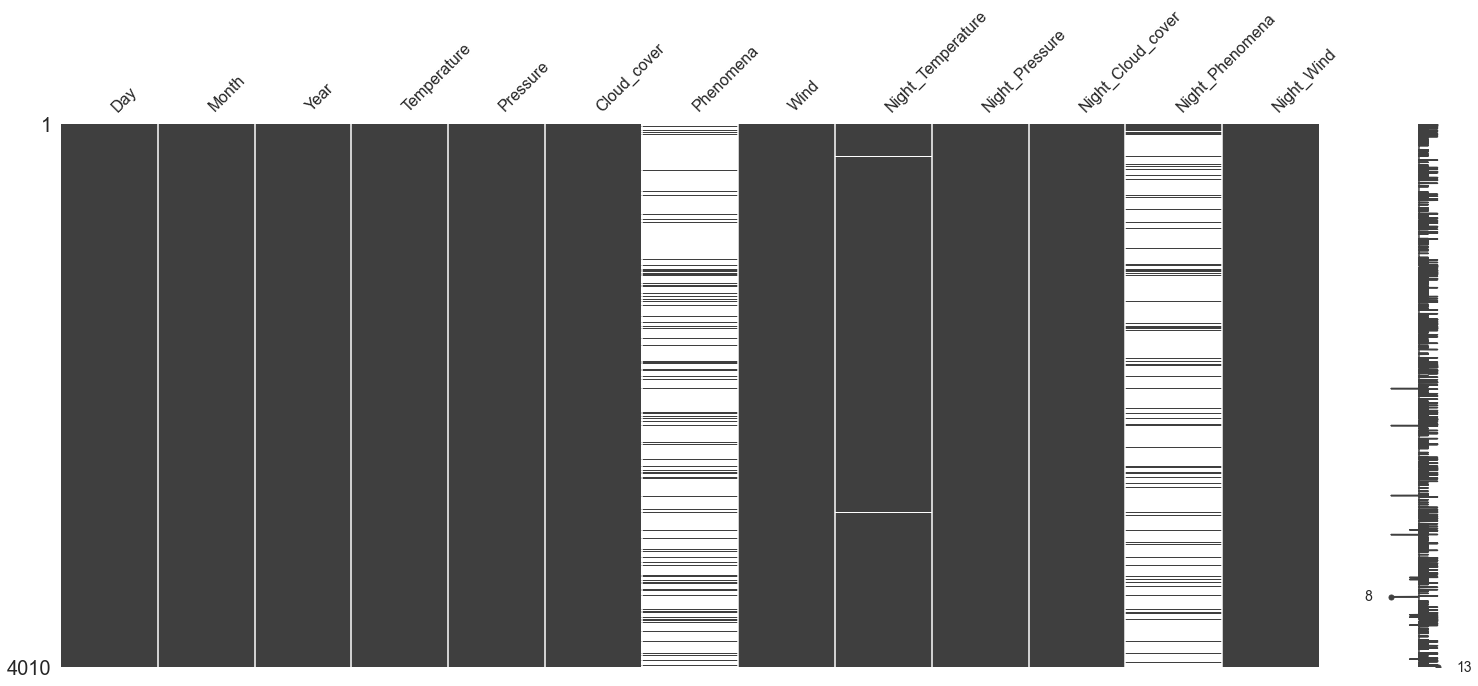

In [87]:
#matrix for datasets with missing values
msno.matrix(df)

In [88]:
#unique data for each column
df.nunique()

Day                  31
Month                12
Year                 11
Temperature          73
Pressure             48
Cloud_cover           4
Phenomena             1
Wind                 74
Night_Temperature    71
Night_Pressure       35
Night_Cloud_cover     3
Night_Phenomena       2
Night_Wind           74
dtype: int64

In [89]:
df[(df['Phenomena'] !='rain')&(df['Phenomena'] !='snow')].sample(5)

,Day,Month,Year,Temperature,Pressure,Cloud_cover,Phenomena,Wind,Night_Temperature,Night_Pressure,Night_Cloud_cover,Night_Phenomena,Night_Wind
2713,10,6,2017,20.0,722.0,partly cloudy,NaN,З 4м/с,15.0,731,clear,NaN,З 4м/с
969,30,8,2012,24.0,738.0,quarterly cloudy,NaN,З 1м/с,18.0,722,clear,NaN,З 1м/с
285,14,10,2010,9.0,731.0,partly cloudy,NaN,ЮЗ 5м/с,6.0,728,partly cloudy,NaN,ЮЗ 5м/с
3252,5,12,2018,-9.0,746.0,clear,NaN,Ю 1м/с,-11.0,742,clear,NaN,Ю 1м/с
3767,3,5,2020,23.0,725.0,quarterly cloudy,NaN,СЗ 2м/с,11.0,732,clear,NaN,СЗ 2м/с


In [90]:
#sum of missing values
df.isnull().sum()

Day                     0
Month                   0
Year                    0
Temperature             5
Pressure                5
Cloud_cover             3
Phenomena            3332
Wind                    5
Night_Temperature       5
Night_Pressure          0
Night_Cloud_cover       7
Night_Phenomena      3425
Night_Wind              5
dtype: int64

In [91]:
#filling in the missing values
df['Phenomena']=df['Phenomena'].fillna('Sun')
df['Night_Phenomena']=df['Night_Phenomena'].fillna('Sun')

In [92]:
df['Temperature']=df['Temperature'].interpolate(method='linear')
df['Pressure']=df['Pressure'].interpolate(method='linear')
df['Cloud_cover']=df['Cloud_cover'].fillna(method='ffill')
df['Night_Temperature']=df['Night_Temperature'].interpolate(method='linear')
df['Night_Cloud_cover']=df['Night_Cloud_cover'].fillna(method='ffill')
df['Wind']=df['Wind'].fillna(method='ffill')
df['Night_Wind']=df['Night_Wind'].fillna(method='ffill')


In [93]:
#check sum of missing values
df.isnull().sum()

Day                  0
Month                0
Year                 0
Temperature          0
Pressure             0
Cloud_cover          0
Phenomena            0
Wind                 0
Night_Temperature    0
Night_Pressure       0
Night_Cloud_cover    0
Night_Phenomena      0
Night_Wind           0
dtype: int64

In [94]:
df[['Night_Wind','Wind']]

,Night_Wind,Wind
0,СВ 2м/с,СВ 2м/с
1,СВ 4м/с,СВ 4м/с
2,СВ 5м/с,СВ 5м/с
3,СВ 3м/с,СВ 3м/с
4,Ю 3м/с,Ю 3м/с
...,...,...
4005,Ю 1м/с,Ю 1м/с
4006,Ю 3м/с,Ю 3м/с
4007,ЮЗ 3м/с,ЮЗ 3м/с
4008,З 2м/с,З 2м/с


In [95]:
#divide the column into two parts
new_df = df['Wind'].str.split(' ',expand=True)
new_df.columns=['Wind Directions','Wind speed']
for column in new_df.columns:
    new_df[column] = new_df[column].str.replace(column+'=','')
df=pd.concat([df,new_df],axis=1).drop('Wind',axis=1)

In [96]:
new_df = df['Night_Wind'].str.split(' ',expand=True)
new_df.columns=['Night Wind Directions','Night Wind speed']
for column in new_df.columns:
    new_df[column] = new_df[column].str.replace(column+'=','')
df=pd.concat([df,new_df],axis=1).drop('Night_Wind',axis=1)

In [97]:
df[['Wind Directions','Wind speed','Night Wind Directions','Night Wind speed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4010 entries, 0 to 4009
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Wind Directions        4010 non-null   object
 1   Wind speed             3953 non-null   object
 2   Night Wind Directions  4010 non-null   object
 3   Night Wind speed       3953 non-null   object
dtypes: object(4)
memory usage: 125.4+ KB


In [98]:
#We remove the m/s, since everyone has the same unit of measurement
df['Wind speed']=df['Wind speed'].str.replace('м/с', '')
df['Night Wind speed']=df['Night Wind speed'].str.replace('м/с', '')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4010 entries, 0 to 4009
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day                    4010 non-null   int64  
 1   Month                  4010 non-null   int64  
 2   Year                   4010 non-null   int64  
 3   Temperature            4010 non-null   float64
 4   Pressure               4010 non-null   float64
 5   Cloud_cover            4010 non-null   object 
 6   Phenomena              4010 non-null   object 
 7   Night_Temperature      4010 non-null   float64
 8   Night_Pressure         4010 non-null   int64  
 9   Night_Cloud_cover      4010 non-null   object 
 10  Night_Phenomena        4010 non-null   object 
 11  Wind Directions        4010 non-null   object 
 12  Wind speed             3953 non-null   object 
 13  Night Wind Directions  4010 non-null   object 
 14  Night Wind speed       3953 non-null   object 
dtypes: f

In [100]:
df[['Wind speed','Night Wind speed']].sample(5)

,Wind speed,Night Wind speed
1376,4,4
3589,2,2
2878,1,1
3348,1,1
3288,1,1


In [101]:
#change datatype to float
df['Wind speed']=df['Wind speed'].astype(float)
df['Night Wind speed']=df['Night Wind speed'].astype(float)

In [102]:
#after splitting the column, the missing values appeared
df[df['Wind speed'].isnull() == True].head()

,Day,Month,Year,Temperature,Pressure,Cloud_cover,Phenomena,Night_Temperature,Night_Pressure,Night_Cloud_cover,Night_Phenomena,Wind Directions,Wind speed,Night Wind Directions,Night Wind speed
8,9,1,2010,-17.0,751.0,clear,Sun,-22.0,737,clear,Sun,Ш,NaN,Ш,NaN
313,11,11,2010,8.0,739.0,clear,Sun,3.0,734,clear,Sun,Ш,NaN,Ш,NaN
415,21,2,2011,-18.0,738.0,clear,Sun,-23.0,732,clear,snow,Ш,NaN,Ш,NaN
418,24,2,2011,-14.0,752.0,clear,Sun,-19.0,732,clear,Sun,Ш,NaN,Ш,NaN
510,27,5,2011,14.0,730.0,partly cloudy,Sun,16.0,739,clear,Sun,Ш,NaN,Ш,NaN


In [103]:
#fill missing values
df['Wind speed']=df['Wind speed'].fillna(0)
df['Night Wind speed']=df['Night Wind speed'].fillna(0)

In [104]:
df.isnull().sum()

Day                      0
Month                    0
Year                     0
Temperature              0
Pressure                 0
Cloud_cover              0
Phenomena                0
Night_Temperature        0
Night_Pressure           0
Night_Cloud_cover        0
Night_Phenomena          0
Wind Directions          0
Wind speed               0
Night Wind Directions    0
Night Wind speed         0
dtype: int64

In [105]:
# unique values of categorical variables
print(df['Wind Directions'].unique())
print(df['Night Wind Directions'].unique())
print(df['Night_Phenomena'].unique())
print(df['Phenomena'].unique())
print(df['Night_Cloud_cover'].unique())
print(df['Cloud_cover'].unique())

['СВ' 'Ю' 'В' 'Ш' 'ЮЗ' 'З' 'С' 'СЗ' 'ЮВ']
['СВ' 'Ю' 'В' 'Ш' 'ЮЗ' 'З' 'С' 'СЗ' 'ЮВ']
['Sun' 'snow' 'rain']
['Sun' 'snow']
['clear' 'cloudy' 'partly cloudy']
['quarterly cloudy' 'cloudy' 'clear' 'partly cloudy']


In [106]:
# converting categorical variables into numeric
le = preprocessing.LabelEncoder()
le.fit(df['Wind Directions'])
df['Wind Directions'] = le.transform(df['Wind Directions'])
le.fit(df['Night Wind Directions'])
df['Night Wind Directions'] = le.transform(df['Night Wind Directions'])
le.fit(df['Night_Phenomena'])
df['Night_Phenomena'] = le.transform(df['Night_Phenomena'])
le.fit(df['Phenomena'])
df['Phenomena'] = le.transform(df['Phenomena'])
le.fit(df['Night_Cloud_cover'])
df['Night_Cloud_cover'] = le.transform(df['Night_Cloud_cover'])
le.fit(df['Cloud_cover'])
df['Cloud_cover'] = le.transform(df['Cloud_cover'])
df['date'] = pd.to_datetime(df[['Day','Month','Year']])


# Data Visualisation

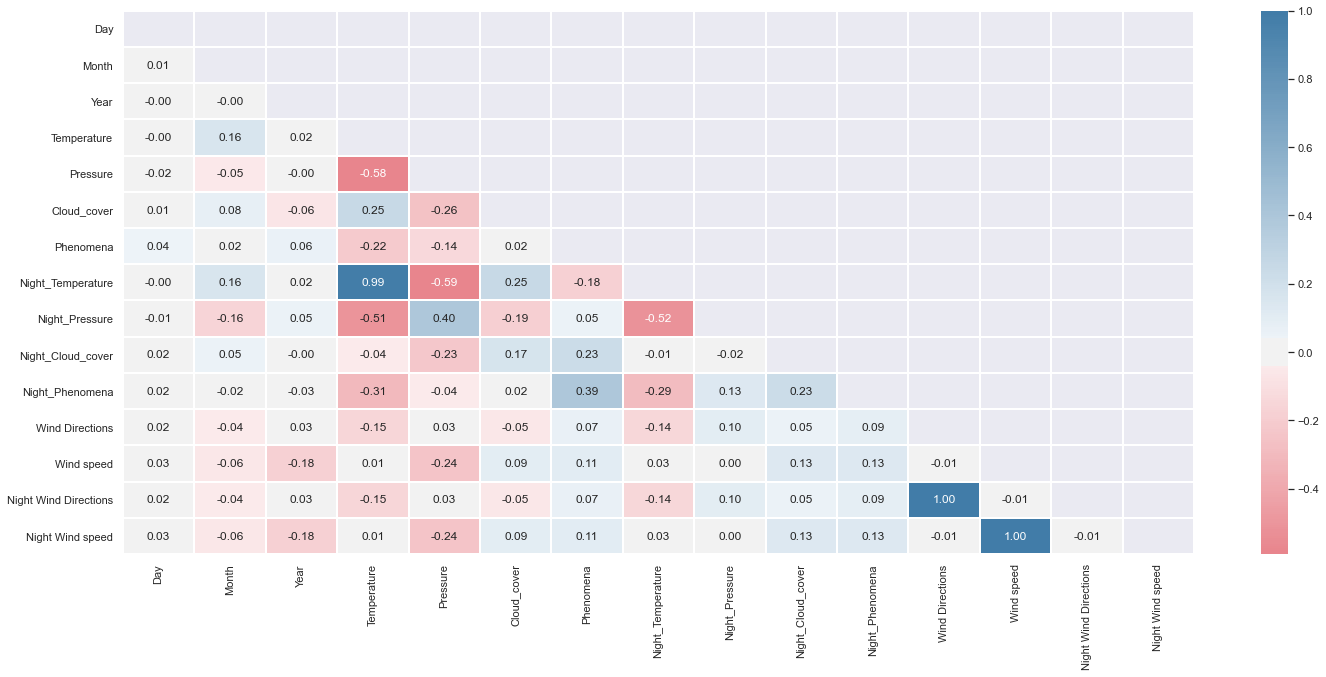

In [107]:
#heatmap correlation dataset 
sns.set(rc={'figure.figsize':(24,10)})
cmap = sns.diverging_palette(h_neg=10, h_pos=240,
as_cmap=True)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap=cmap, linewidths=1,
annot=True, fmt=".2f")

In [108]:
#calculate the average maximum minimum temperature by year
stat_df = df.groupby('Year',as_index = False).agg({'Temperature': ['mean', 'min', 'max']})
stat_df

Year Temperature            
                mean   min   max
0   2010    7.620879 -28.0  37.0
1   2011    7.186813 -25.0  31.0
2   2012    7.912088 -37.0  37.0
3   2013    8.172603 -25.0  32.0
4   2014    6.931507 -29.0  37.0
5   2015    8.343836 -25.0  38.0
6   2016    7.952186 -27.0  32.0
7   2017    8.858127 -24.0  35.0
8   2018    5.880165 -32.0  33.0
9   2019    8.442466 -25.0  37.0
10  2020    8.980874 -20.0  35.0

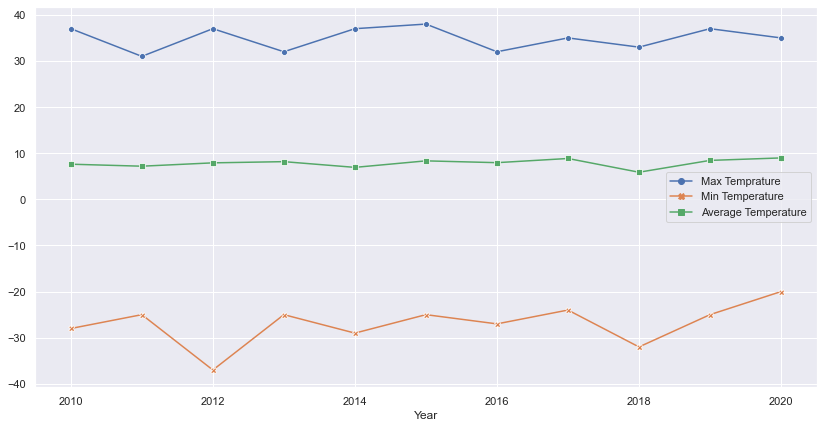

In [109]:
# line plot maximum,minimum,average temperature
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.figure(figsize=(14,7))
sns.lineplot(data=pd.DataFrame({'Year':stat_df['Year'],'Max Temprature':stat_df['Temperature']['max'],'Min Temperature':stat_df['Temperature']['min'],
                                'Average Temperature':stat_df['Temperature']['mean']}).set_index('Year'),markers=True, dashes=False)

In [110]:
#calculate the average maximum wind speed by year and month
s = df.groupby(['Year','Month'],as_index = False).agg({'Wind speed': ['mean', 'max']})
s

Year Month Wind speed      
                      mean   max
0    2010     1   3.161290   7.0
1    2010     2   3.964286   9.0
2    2010     3   4.677419  12.0
3    2010     4   3.800000   9.0
4    2010     5   4.161290   8.0
..    ...   ...        ...   ...
127  2020     8   1.967742   3.0
128  2020     9   2.600000   5.0
129  2020    10   2.096774   5.0
130  2020    11   2.166667   4.0
131  2020    12   2.096774   4.0

[132 rows x 4 columns]

In [111]:
#we determine the seasons by looking at the months
def getSeason(month):
    if (month >= 12 or month <= 2):
        return "WINTER"
    elif (month >= 3 and month <=5):
        return "SPRING"
    elif (month >=6 and month <= 8):
        return "SUMMER"
    else:
        return "FALL"

In [112]:
seasons = []
for index, row in s.iterrows():
    seasons.append(getSeason(row['Month'][0]))

In [113]:
seasons = pd.DataFrame(seasons)
seasons.columns = ['season_name']
seasons

,season_name
0,WINTER
1,WINTER
2,SPRING
3,SPRING
4,SPRING
...,...
127,SUMMER
128,FALL
129,FALL
130,FALL


In [114]:
# we merge two dataframe 
merged = s.merge(seasons, left_index=True, right_index=True)
merged

C:\Users\User\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning:

merging between different levels can give an unintended result (2 levels on the left, 1 on the right)



,"(Year, )","(Month, )","(Wind speed, mean)","(Wind speed, max)",season_name
0,2010,1,3.161290,7.0,WINTER
1,2010,2,3.964286,9.0,WINTER
2,2010,3,4.677419,12.0,SPRING
3,2010,4,3.800000,9.0,SPRING
4,2010,5,4.161290,8.0,SPRING
...,...,...,...,...,...
127,2020,8,1.967742,3.0,SUMMER
128,2020,9,2.600000,5.0,FALL
129,2020,10,2.096774,5.0,FALL
130,2020,11,2.166667,4.0,FALL


In [115]:
merged.columns = ['Year','Month','Mean','Max','season_name']
merged

,Year,Month,Mean,Max,season_name
0,2010,1,3.161290,7.0,WINTER
1,2010,2,3.964286,9.0,WINTER
2,2010,3,4.677419,12.0,SPRING
3,2010,4,3.800000,9.0,SPRING
4,2010,5,4.161290,8.0,SPRING
...,...,...,...,...,...
127,2020,8,1.967742,3.0,SUMMER
128,2020,9,2.600000,5.0,FALL
129,2020,10,2.096774,5.0,FALL
130,2020,11,2.166667,4.0,FALL


In [116]:

import plotly.express as px
fig = px.bar(merged, x="Year", y="Mean",
             color='season_name', barmode='group',
             title='Sum of the mean wind speed of each season',
             height=400,width = 800)

fig.show()
fig = px.bar(merged, x="Year", y="Max",
             color='season_name', barmode='group',
             title='Sum of the max wind speed of each season',
             height=400,width = 800)

fig.show()

In [117]:
#define maximum wind speed by season name
max_speed = merged.groupby(['Year','season_name'],as_index = False).agg({'Max': 'max'})
max_speed.head()

,Year,season_name,Max
0,2010,FALL,9.0
1,2010,SPRING,12.0
2,2010,SUMMER,7.0
3,2010,WINTER,9.0
4,2011,FALL,8.0


In [118]:
fig = px.bar(max_speed, x="Year", y="Max",
             color='season_name', barmode='group',
             title='Max wind speed of each season',
             height=400,width = 800)

fig.show()

mean_speed = merged.groupby(['Year','season_name'],as_index = False).agg({'Mean': 'mean'})
fig = px.bar(mean_speed, x="Year", y="Mean",
             color='season_name', barmode='group',
             title='Mean wind speed of each season',
             height=400,width = 800)
fig.show()

In [75]:
df.head()

,Day,Month,Year,Temperature,Pressure,Cloud_cover,Phenomena,Night_Temperature,Night_Pressure,Night_Cloud_cover,Night_Phenomena,Wind Directions,Wind speed,Night Wind Directions,Night Wind speed,date
0,1,1,2010,-19.0,734.0,3,0,-24.0,737,0,0,3,2.0,3,2.0,2010-01-01
1,2,1,2010,-23.0,736.0,1,0,-16.0,737,1,0,3,4.0,3,4.0,2010-01-02
2,3,1,2010,-17.0,728.0,1,1,-19.0,737,1,2,3,5.0,3,5.0,2010-01-03
3,4,1,2010,-9.0,729.0,1,0,-5.0,737,1,0,3,3.0,3,3.0,2010-01-04
4,5,1,2010,0.0,726.0,1,1,-4.0,737,1,2,6,3.0,6,3.0,2010-01-05


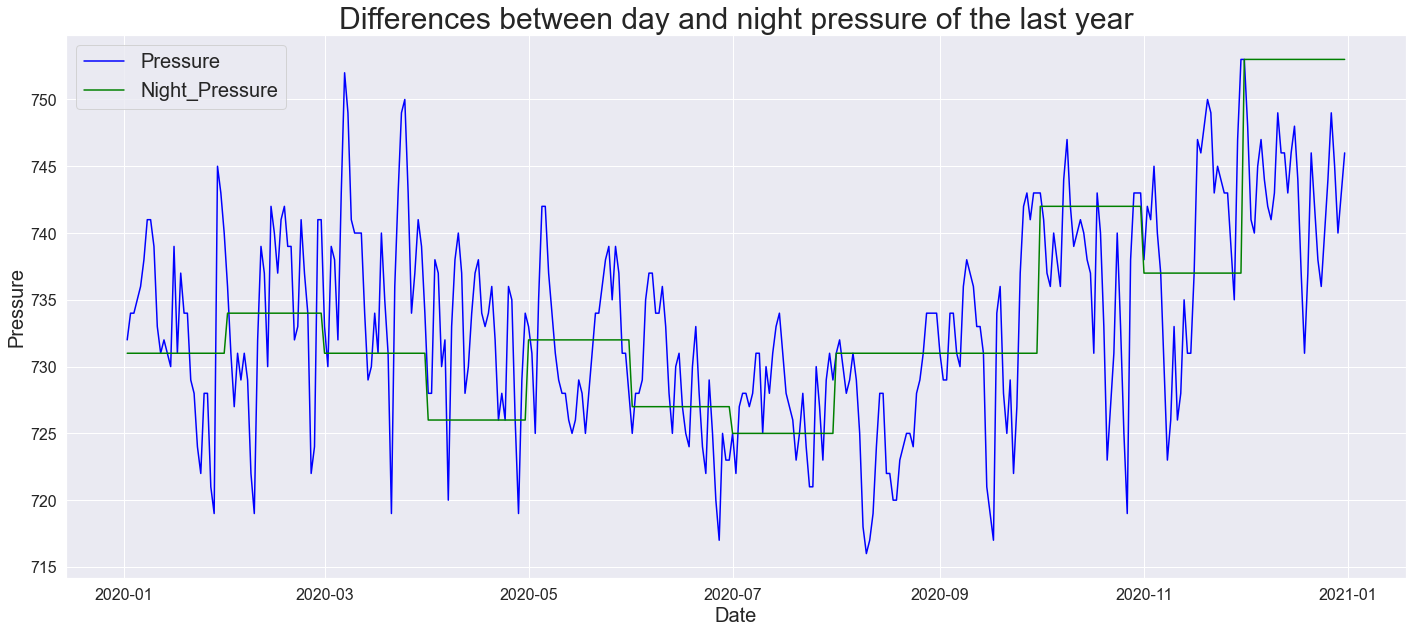

In [76]:
f, ax = plt.subplots(1, 1)

sns.lineplot(ax = ax,x = df['date'].iloc[-365:], y = df['Pressure'].iloc[-365:] , color='blue')
sns.lineplot(ax = ax, x = df['date'].iloc[-365:], y = df['Night_Pressure'].iloc[-365:] , color='green')

ax.legend(labels=['Pressure', 'Night_Pressure'], prop={'size': 20})
ax.set_title('Differences between day and night pressure of the last year',fontsize=30);
ax.set_xlabel('Date',fontsize=20)
ax.set_ylabel('Pressure',fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

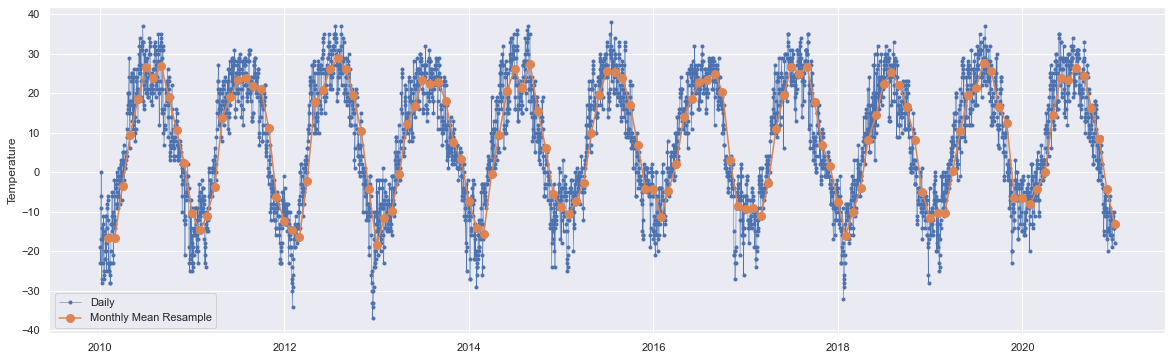

In [77]:
s = df[['date','Temperature']]
s = s.set_index('date')
y = s['Temperature']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Temperature')
ax.legend();

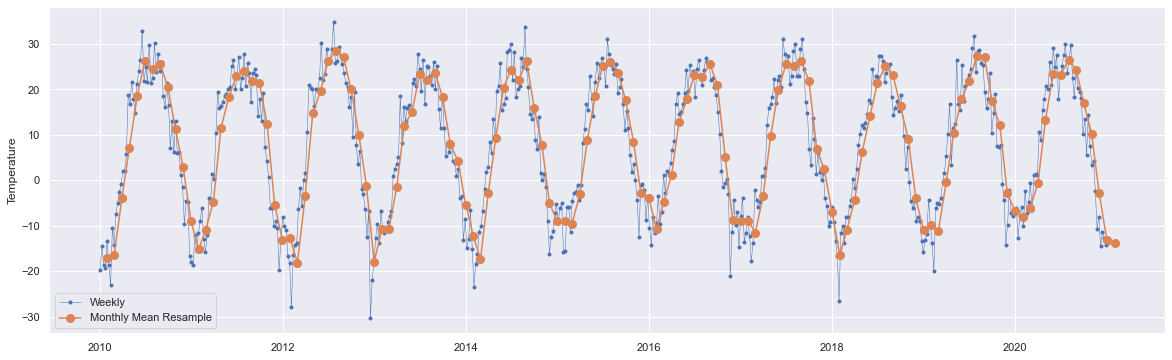

In [78]:
week = s.resample('W').mean()
y = week['Temperature']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Temperature')
ax.legend();

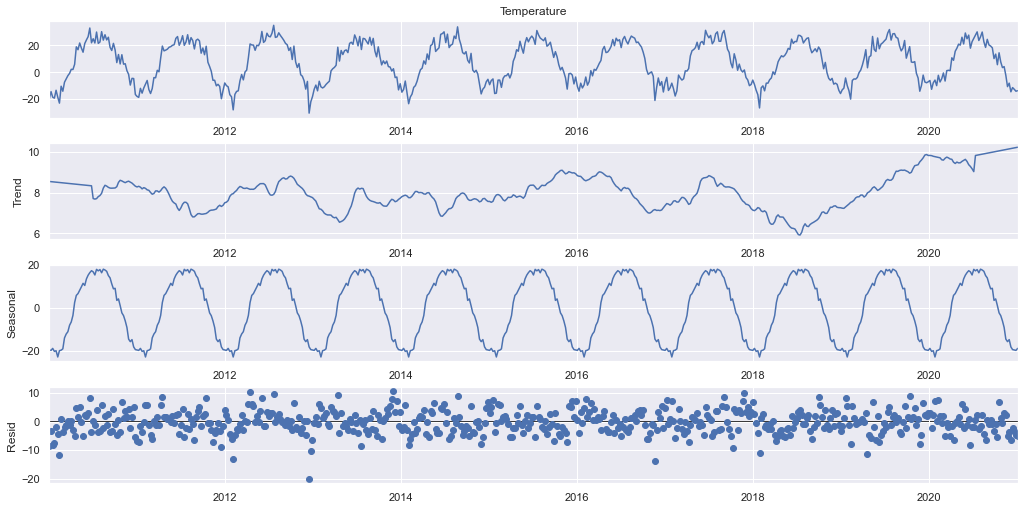

In [79]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
seasonal_decompose(y)

After looking at the four pieces of decomposed graphs, we can tell that our  dataset has an overall increasing trend as well as a yearly seasonality. 

# Model Creation and Evaluation

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Here we created empty df for the number of days the temperature is to be forecasted, where future predicted values will be stored
def create_dates(start,days):
    v = pd.date_range(start=start, periods=days+1, freq='D', closed='right')
    seven_day_forecast = pd.DataFrame(index=v) 
    return seven_day_forecast
# While splitting the values into train and test set, the order of the date is very imported. 
# This method splits the dataset according to user's ratio
def train_test_split(value, ratio):
    nrow = len(value)
    print('Astana total samples: ',nrow)
    split_row = int((nrow)*ratio)
    print('Training samples: ',split_row)
    print('Testing samples: ',nrow-split_row)
    train = value.iloc[:split_row]
    test = value.iloc[split_row:]
    return train, test, split_row   
# to avoid problems with training we need to scal our dataset. it train better compared to raw unscaled data. This method scales the train and test data using a minmax scaler from sci-kit learn.
def data_transformation(train_tract1,test_tract1):
    scaler = MinMaxScaler()
    train_tract1_scaled = scaler.fit_transform(train_tract1)
    test_tract1_scaled = scaler.fit_transform(test_tract1)          
    train_tract1_scaled_df = pd.DataFrame(train_tract1_scaled, index = train_tract1.index, columns=[train_tract1.columns[0]])
    test_tract1_scaled_df = pd.DataFrame(test_tract1_scaled,
                                         index = test_tract1.index, columns=[test_tract1.columns[0]])
    return train_tract1_scaled_df, test_tract1_scaled_df, scaler

# feature builder - This section creates feature set with lag number of predictors--Creating features using lagged data
def timeseries_feature_builder(df, lag):
    df_copy = df.copy()
    for i in range(1,lag):
        df_copy['lag'+str(i)] = df.shift(i) 
    return df_copy
    df_copy = df.copy()
# preprocessing -- drop null values and make arrays 
def make_arrays(train_tract1,test_tract1):
    X_train_tract1_array = train_tract1.dropna().drop(train_tract1.columns[0], axis=1).values
    y_train_tract1_array = train_tract1.dropna()[train_tract1.columns[0]].values
    
    X_test_tract1_array = test_tract1.dropna().drop(test_tract1.columns[0], axis=1).values
    y_test_tract1_array = test_tract1.dropna()[test_tract1.columns[0]].values    
    
    return X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array

# Define LSTM model
def lstm_model(units, trainX, testX, y_train_tract1_array, y_test_tract1_array):
    model = Sequential()
    model.add(LSTM(units,return_sequences=True, input_shape=(trainX.shape[1],trainX.shape[2]),kernel_initializer='lecun_uniform'))
    model.add(Dropout(0.2))    
    model.add(LSTM(units, return_sequences=True))
    model.add(Dropout(0.2))    
    model.add(LSTM(units))
    model.add(Dropout(0.2))
    model.add(Dense(1))        
    model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
    
    model.fit(trainX, y_train_tract1_array, batch_size=120, epochs=100, validation_data=(testX, y_test_tract1_array), verbose=0)
    return model
# In the validation method, the fitted model is used here to predict on the test set and the results
# are added to a column called Forecast for visualization. The accuracy of the predicted result is 
#measured by r-square method, to check its similarity with the actual temperature readings, which is intuitive to interpret.
def valid_result(model, testX, y_test_tract1_array, scaler, value, split_row, lag):    
    
    testPredict = model.predict(testX)
    rSquare_test = r2_score(y_test_tract1_array, testPredict)
    
    print('Test R-squared is: %f'%rSquare_test)    
    testPredict = scaler.inverse_transform(testPredict)        
    new_test_tract1 = value.iloc[split_row:]       
    test_tract1_pred = new_test_tract1.iloc[lag:].copy()
    test_tract1_pred['Forecast'] = testPredict
    return test_tract1_pred 

# the model is used to forecast temperature for the next 31 days or the month of January, 2021 by a walk forward of each day.
# Here the past lag number of days are used to predict the temperature for January 1st. This predicted
# value is then included as a predictor for forecasting the next days value, and input into the fitted model along with past
# days temperatures, and so on till all the days are predicted.
def forecast(model, testX, test_tract1, lag, scaler, days):
    pred_days = []
    new0 = testX[-1]        
    last = test_tract1.iloc[-1]
    new_predict = last[0]        
    new_array = np.insert(new0, 0, new_predict)        
    new_array = np.delete(new_array, -1)
    new_array_reshape = np.reshape(new_array, (-1,1,lag))       
    new_predict = model.predict(new_array_reshape)
    temp_predict = scaler.inverse_transform(new_predict) 
    pred_days.append(temp_predict[0][0].round(2))
    
    for i in range(1,days):
        new_array = np.insert(new_array, 0, new_predict)             
        new_array = np.delete(new_array, -1)
        new_array_reshape = np.reshape(new_array, (-1,1,lag))            
        new_predict = model.predict(new_array_reshape)
        temp_predict = scaler.inverse_transform(new_predict) 
        pred_days.append(temp_predict[0][0].round(2))
    return pred_days  

In [ ]:
def astana_temp_lstm(s, lag, days):    
    
    forecast_lstm = create_dates('2020-12-31',days) 
    

    train_tract1, test_tract1, split_row = train_test_split(s,  0.90)        
    train_tract1_scaled_df, test_tract1_scaled_df, scaler = data_transformation(train_tract1,test_tract1) 
    
    train_tract1 = timeseries_feature_builder(train_tract1_scaled_df, lag+1) 
    test_tract1 = timeseries_feature_builder(test_tract1_scaled_df, lag+1)               
    
    X_train_tract1_array, y_train_tract1_array, X_test_tract1_array, y_test_tract1_array = make_arrays(train_tract1, 
                                                                                                       test_tract1)        
    trainX = np.reshape(X_train_tract1_array, (X_train_tract1_array.shape[0],1,X_train_tract1_array.shape[1]))
    testX = np.reshape(X_test_tract1_array, (X_test_tract1_array.shape[0],1,X_test_tract1_array.shape[1]))                
    # LSTM modelling & forecast
    model = lstm_model(30, trainX, testX, y_train_tract1_array, y_test_tract1_array)             
    
    test_tract1_pred = valid_result(model, testX, y_test_tract1_array, scaler, s, split_row, lag)        
    pred_days = forecast(model, testX, test_tract1, lag, scaler, days)       

    forecast_lstm['Astana'] = np.array(pred_days)       
    # plot result
    plt.figure(figsize=(20,5))
    plt.plot(test_tract1_pred)        
    plt.plot(forecast_lstm['Astana'], color='red', label='forecast')         
    plt.ylabel('Temperature(°C)', fontsize=16)
    plt.legend(loc='upper right',prop={'size': 20})
    plt.title('Astana - January 2021 Temperature Forecast', fontsize=30)
    plt.tick_params(labelsize=16)
    plt.show()        
        
    return(forecast_lstm,test_tract1_pred)

In [ ]:
lstm_prediction, pred = astana_temp_lstm(s,30,31)

In [ ]:
pred

# Conclusion

### Are there any dramatic changes in temperature throughout the period?
There are no big changes in the maximum of the temperature of each year, but we can observe that the minimum temperature is increasing now.

### What season has the strongest winds?
Looking at the plots, we can say that the wind is stronger in spring and winter than in summer and autumn. But another fact is that the strongest wind was in the fall.But on average, the wind speed in the spring is stronger.

### Were there any changes of the average wind speed?
There were but the difference is not so big.In 2019 and 2020, there is a slight decrease in wind speed.

### Discover the differences between day and night pressure.
Plot shows, that by the night pressure around will stabilize, while day pressure changed every day.

### Create good weather forecasting model with LSTM model
In this notebook, a timeseries temperature dataset was used to predict daily temperature for Astana for the month of January using historic data from weather station website. The method used for a study - a deep learning framework of LSTM. The model was able to model the data relatively well as evident from the high accuracy obtained for both train and test set. However, we should take into account that  our model forecasts the temperature based on previous historic data. This means that with anomally changes in the world, our model will crack in prediction.